### Business Case & Project Details

Given a series of images, we want to build a machine learning model that is able to identify the fashion content of each image. Examples of classes include shorts, bags, dresses etc.

This is a simpler, smaller version of the Amazon Echo Look Style Assistant. 

Applications could have real life benefits. By idenitifying most liked images on social media platforms, we could provide targeted advertisements that stay on top of fashion trends.

Our dataset will contain 70, 000 images:
- 60,000 for training

- 10, 000 for testing

- Images are 28 x 28 grayscale

There will be 10 target output classes.


A note on greyscale:
- System of 256 tones ranging from 0-255

- 0 represents black and 255 represents white

Therefore, each image will be represented by a row of 28x28 = 784 values to encode its grayscale values.


Detailed dataset info from Kaggle:

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. 


Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top

- 1 Trouser

- 2 Pullover

- 3 Dress

- 4 Coat

- 5 Sandal

- 6 Shirt

- 7 Sneaker

- 8 Bag

- 9 Ankle boot

### Importing libraries & data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
fashion_train_df = pd.read_csv("fashion-mnist_train.csv", sep = ",")
fashion_test_df = pd.read_csv("fashion-mnist_test.csv", sep = ",")

### Dataset visualization

In [9]:
fashion_train_df.head(n=5)
# Observe that each row represents a single image

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_train_df.shape

(60000, 785)

In [11]:
fashion_test_df.shape

(10000, 785)

In [12]:
training = np.array(fashion_train_df, dtype = "float32")
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
testing = np.array(fashion_test_df, dtype = "float32")
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

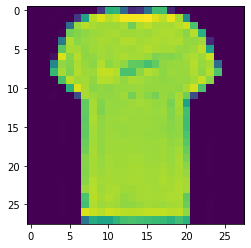

In [18]:
# Visualizing single images in the training set
plt.imshow(training[10, 1:].reshape(28, 28))

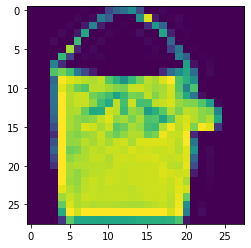

In [19]:
plt.imshow(training[543, 1:].reshape(28, 28))

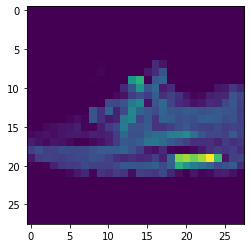

In [20]:
plt.imshow(training[987, 1:].reshape(28, 28))

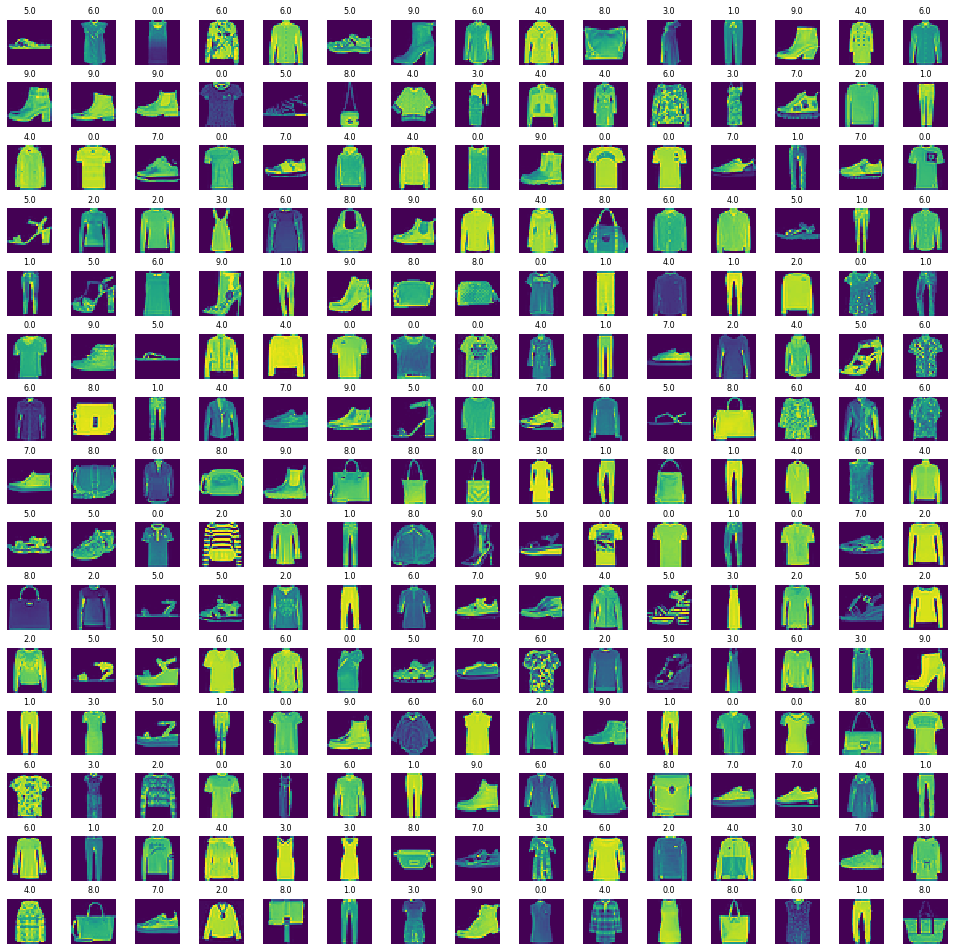

In [24]:
# Viewing 225 random training images in grid format
# First specify the dimensions of our grid
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid, figsize = (17,17))
axes = axes.ravel() 
# flatten the 15 x 15 matrix into a 225 unit array

n_training = len(training)

for i in np.arange(0, w_grid * l_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape(28, 28))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis("off")
    
plt.subplots_adjust(hspace = 0.4)

### Model Training

In [26]:
X_train = training[:, 1:]/255 # divide by 255 for normalization
y_train = training[:, 0]
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [32]:
# We need to reshape our data to 28 x 28 x 1 for the CNN
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

X_validate.shape

(12000, 28, 28, 1)

In [87]:
import keras
from keras.models import Sequential
from keras.layers import (Conv2D, MaxPooling2D, 
                          Dense, Flatten, Dropout)
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import regularizers

In [35]:
cnn_model = Sequential()

In [36]:
cnn_model.add(Conv2D(filters = 32, 3, 3, input_shape = (28, 28, 1), activation = "relu"))

In [37]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [38]:
cnn_model.add(Flatten())
# To produce a single continuous vector to serve as input
# for our ANN

In [41]:
cnn_model.add(Dense(units = 32, activation = "relu"))

In [42]:
cnn_model.add(Dense(units = 10, activation = "sigmoid"))

In [43]:
cnn_model.compile(loss = "sparse_categorical_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])

In [50]:
cnn_model.fit(x = X_train,
              y = y_train,
              validation_data = (X_validate, y_validate), 
              epochs = 50, 
              batch_size = 128, 
              verbose = 1)

Epoch 1/50
375/375 [==============================] - 4s 10ms/step - loss: 0.2840 - accuracy: 0.8943 - val_loss: 0.3538 - val_accuracy: 0.8737
Epoch 2/50
375/375 [==============================] - 3s 8ms/step - loss: 0.2748 - accuracy: 0.8991 - val_loss: 0.3519 - val_accuracy: 0.8738
Epoch 3/50
375/375 [==============================] - 3s 8ms/step - loss: 0.2749 - accuracy: 0.8986 - val_loss: 0.3526 - val_accuracy: 0.8725
Epoch 4/50
375/375 [==============================] - 4s 9ms/step - loss: 0.2723 - accuracy: 0.9003 - val_loss: 0.3525 - val_accuracy: 0.8716
Epoch 5/50
375/375 [==============================] - 3s 9ms/step - loss: 0.2687 - accuracy: 0.9013 - val_loss: 0.3470 - val_accuracy: 0.8744
Epoch 6/50
375/375 [==============================] - 3s 9ms/step - loss: 0.2676 - accuracy: 0.9017 - val_loss: 0.3608 - val_accuracy: 0.8687
Epoch 7/50
375/375 [==============================] - 3s 8ms/step - loss: 0.2663 - accuracy: 0.9029 - val_loss: 0.3655 - val_accuracy: 0.8671
Epoch

### Model Evaluation

In [51]:
evaluation = cnn_model.evaluate(x = X_test,
                               y = y_test)
print("Test accuracy: {: .3f}".format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3555 - accuracy: 0.8779
Test accuracy:  0.878


In [53]:
y_pred = cnn_model.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 1, 2, ..., 8, 8, 1])

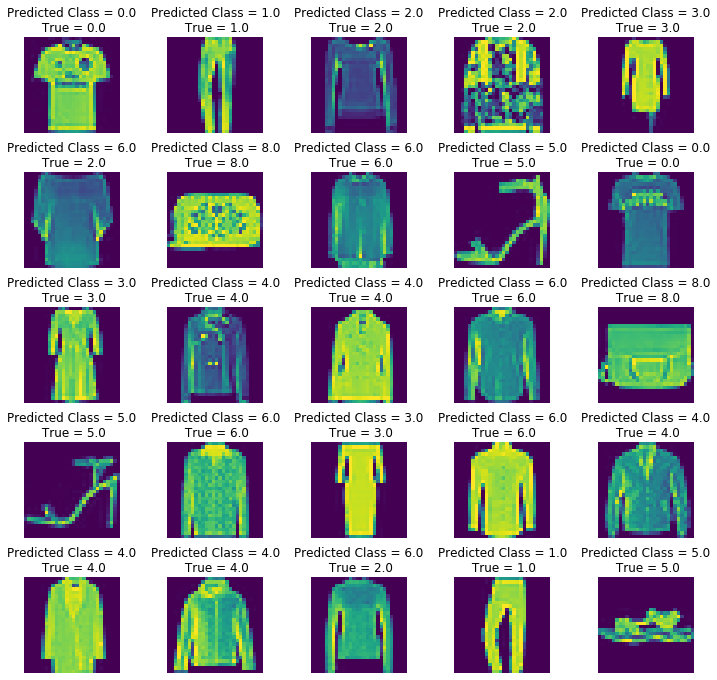

In [68]:
# A comparison of predicted vs. true class for the first 25
# observations in the testing set
w = 5
l = 5

fig, axes = plt.subplots(l, w, figsize = (12,12))
axes = axes.ravel() 

for i in np.arange(0, w * l):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Predicted Class = {:0.1f}\n True = {:0.1f}".format(y_pred[i], y_test[i]))
    axes[i].axis("off")
    
plt.subplots_adjust(wspace = 0.5)

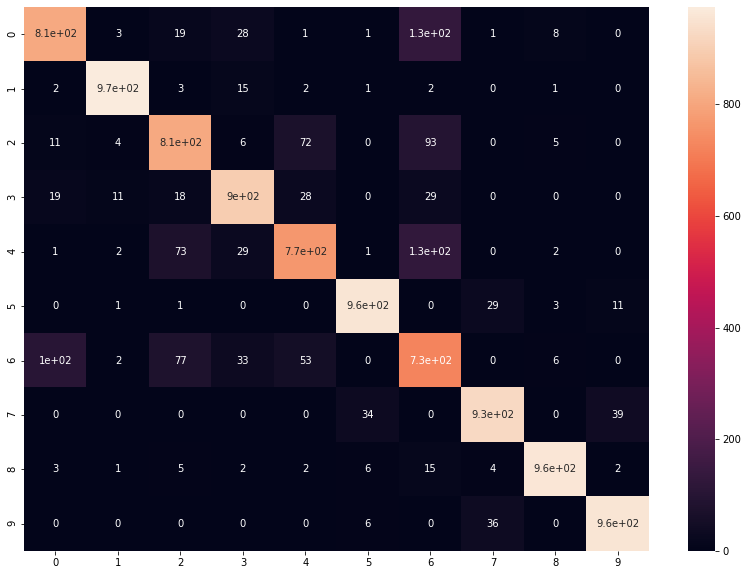

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True)

In [72]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.81      0.83      1000
     Class 1       0.98      0.97      0.97      1000
     Class 2       0.80      0.81      0.81      1000
     Class 3       0.89      0.90      0.89      1000
     Class 4       0.83      0.77      0.80      1000
     Class 5       0.95      0.95      0.95      1000
     Class 6       0.65      0.73      0.68      1000
     Class 7       0.93      0.93      0.93      1000
     Class 8       0.97      0.96      0.97      1000
     Class 9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Improving the model

There are several ways we could improve the accuracy of our model.
- Adding more features

- Adding dropouts: droping some units from the neural network

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

Dropout is easily implemented by randomly selecting nodes to be dropped-out with a given probability (e.g. 20%) each weight update cycle. This is how Dropout is implemented in Keras. Dropout is only used during the training of a model and is not used when evaluating the skill of the model.

In [96]:
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(filters = 64, kernel_size = 2, padding='same', activation='relu', input_shape=(28,28,1))) 
cnn_model2.add(MaxPooling2D(pool_size=2))
cnn_model2.add(Dropout(0.2))
cnn_model2.add(Conv2D(filters = 32, kernel_size = 2, padding='same', activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=2))
cnn_model2.add(Dropout(0.2))
cnn_model2.add(Flatten())
cnn_model2.add(Dense(units = 10, activation = 'softmax'))

cnn_model2.compile(loss = "sparse_categorical_crossentropy",
                  optimizer = Adam(lr = 0.001, decay = 1e-6),
                  metrics = ["accuracy"])

In [97]:
cnn_model2.fit(x = X_train,
              y = y_train,
              validation_data = (X_validate, y_validate), 
              epochs = 50, 
              batch_size = 128, 
              verbose = 1)

Epoch 1/50
375/375 [==============================] - 49s 131ms/step - loss: 0.7195 - accuracy: 0.7382 - val_loss: 0.4513 - val_accuracy: 0.8375
Epoch 2/50
375/375 [==============================] - 49s 130ms/step - loss: 0.4603 - accuracy: 0.8335 - val_loss: 0.3977 - val_accuracy: 0.8600
Epoch 3/50
375/375 [==============================] - 49s 130ms/step - loss: 0.4120 - accuracy: 0.8518 - val_loss: 0.3658 - val_accuracy: 0.8682
Epoch 4/50
375/375 [==============================] - 49s 130ms/step - loss: 0.3843 - accuracy: 0.8620 - val_loss: 0.3443 - val_accuracy: 0.8803
Epoch 5/50
375/375 [==============================] - 49s 130ms/step - loss: 0.3653 - accuracy: 0.8689 - val_loss: 0.3210 - val_accuracy: 0.8885
Epoch 6/50
375/375 [==============================] - 50s 132ms/step - loss: 0.3504 - accuracy: 0.8761 - val_loss: 0.3149 - val_accuracy: 0.8894
Epoch 7/50
375/375 [==============================] - 51s 136ms/step - loss: 0.3389 - accuracy: 0.8788 - val_loss: 0.3049 - val_ac

In [98]:
evaluation2 = cnn_model2.evaluate(x = X_test,
                               y = y_test)
print("Test accuracy: {: .3f}".format(evaluation[1]))

313/313 [==============================] - 3s 9ms/step - loss: 0.2274 - accuracy: 0.9199
Test accuracy:  0.878
